In [1]:
import sys
sys.path.append("..")
from utilities import defaultPlotting
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import matplotlib.lines as lines
from matplotlib.pyplot import arrow

In [2]:
def kth_diag_indices(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], cols[:k]
    elif k > 0:
        return rows[:-k], cols[k:]
    else:
        return rows, cols

In [3]:
np.random.seed(42)

matSize = 150
mat = np.zeros((matSize, matSize))
backgroundFrequency = ([1] * 9) + ([-1] * 8) + ([0] * 4)
choices = backgroundFrequency.copy()
for diag in range(matSize):
    if diag % 3 == 0:
        choices.append(0)
    idx = kth_diag_indices(mat, diag)
    values = np.random.choice(choices, len(idx[0]))
    mat[idx] = values

tadSize = 50
pos = 10
tadChoices = backgroundFrequency + ([1] * 4)
mat[pos: pos + tadSize, pos: pos + tadSize] = np.random.choice(tadChoices, (tadSize, tadSize))

mat = np.triu(mat)
mat = mat + mat.T - np.diag(np.diag(mat))
filt = median_filter(mat, size=3)

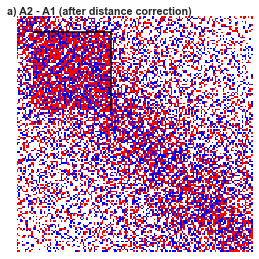

In [4]:
defaultPlotting(width=90, ratio=1)
fig, ax = plt.subplots()
sns.heatmap(
    mat, cmap='bwr', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'black'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))

fig.tight_layout()
ax.text(0, 1, 'a) A2 - A1 (after distance correction)', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('ExampleASTAD-a.svg', transparent=True)

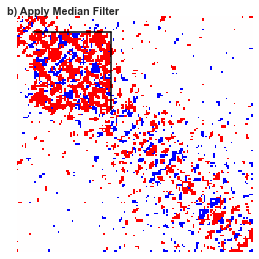

In [5]:
fig, ax = plt.subplots()
sns.heatmap(
    filt, cmap='bwr', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'black'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))

fig.tight_layout()
ax.text(0, 1, 'b) Apply Median Filter', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('ExampleASTAD-b.svg', transparent=True)

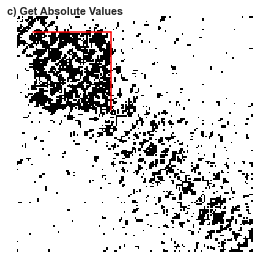

In [7]:
fig, ax = plt.subplots()
sns.heatmap(
    np.abs(filt), cmap='binary', vmin=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'red'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))

fig.tight_layout()
ax.text(0, 1, 'c) Get Absolute Values', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('ExampleASTAD-c.svg', transparent=True)

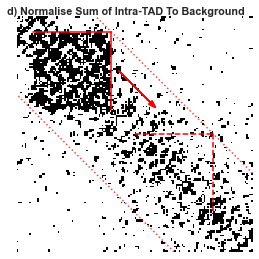

In [8]:
fig, ax = plt.subplots()
sns.heatmap(
    np.abs(filt), cmap='binary', vmin=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'red'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))

ax.add_artist(
    lines.Line2D([matSize, tadSize], [matSize - tadSize, 0], 
                 color=colour, linestyle='dotted', linewidth=1.5, alpha=0.75))
ax.add_artist(
    lines.Line2D([matSize - tadSize, 0], [matSize, tadSize], 
                 color=colour, linestyle='dotted', linewidth=1.5, alpha=0.75))
ax.add_artist(
    arrow(
        pos + tadSize + 5, 10 + (tadSize // 2), 20, 20,
        color=colour, linestyle='-', linewidth=1.5, head_width=3))

i = 75
ax.add_artist(
    lines.Line2D([i + tadSize, i + tadSize], [i, i + tadSize],
                 color=colour, linestyle='--', linewidth=1.5))
ax.add_artist(
    lines.Line2D([i, i + tadSize], [i, i],
                 color=colour, linestyle='--', linewidth=1.5))

fig.tight_layout()
ax.text(0, 1, 'd) Normalise Sum of Intra-TAD To Background', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')

fig.savefig('ExampleASTAD-d.svg', transparent=True)

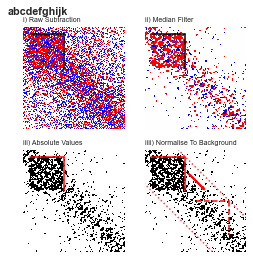

In [19]:
defaultPlotting(size=9, width=90, ratio=1)
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

ax = axes[0]
sns.heatmap(
    mat, cmap='bwr', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'black'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))
ax.set_title('i) Raw Subtraction', fontsize=7, loc='left')

ax = axes[1]
sns.heatmap(
    filt, cmap='bwr', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'black'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))
ax.set_title('ii) Median Filter', fontsize=7, loc='left')

ax = axes[2]
sns.heatmap(
    np.abs(filt), cmap='binary', vmin=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'red'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))
ax.set_title('iii) Absolute Values', fontsize=7, loc='left')

ax = axes[3]
sns.heatmap(
    np.abs(filt), cmap='binary', vmin=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'red'
ax.add_artist(
    lines.Line2D([pos + tadSize, pos + tadSize], [pos, pos + tadSize],
                 color=colour, linestyle='-', linewidth=1.5))
ax.add_artist(
    lines.Line2D([pos, pos + tadSize], [pos, pos],
                 color=colour, linestyle='-', linewidth=1.5))

ax.add_artist(
    lines.Line2D([matSize, tadSize], [matSize - tadSize, 0], 
                 color=colour, linestyle='dotted', linewidth=1.5, alpha=0.75))
ax.add_artist(
    lines.Line2D([matSize - tadSize, 0], [matSize, tadSize], 
                 color=colour, linestyle='dotted', linewidth=1.5, alpha=0.75))
ax.add_artist(
    arrow(
        pos + tadSize + 5, 10 + (tadSize // 2), 20, 20,
        color=colour, linestyle='-', linewidth=1.5, head_width=3))

i = 75
ax.add_artist(
    lines.Line2D([i + tadSize, i + tadSize], [i, i + tadSize],
                 color=colour, linestyle='--', linewidth=1.5))
ax.add_artist(
    lines.Line2D([i, i + tadSize], [i, i],
                 color=colour, linestyle='--', linewidth=1.5))
ax.set_title('iiii) Normalise To Background', fontsize=7, loc='left')


fig.tight_layout()
ax.text(0, 1, 'abcdefghijk', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('ExampleASTAD.svg')